#### import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
l=[[1,3],[2,4],[3,2],[4,4],[5,5]]
df=pd.DataFrame(l,columns=['x','y'])
df


,x,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [37]:
x=df.x
y=df.y
print(x)
print(y)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
0    3
1    4
2    2
3    4
4    5
Name: y, dtype: int64


In [34]:
mean_x=np.mean(x)
mean_y=np.mean(y)
print(mean_x)
print(mean_y)


n=len(x)
print(n)

3.0
3.6
5


In [38]:
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x) * (y[i]-mean_y)
    denom += (x[i]-mean_x) ** 2
    
W1=numer/denom
print(W1)

W0=mean_y - (W1 * mean_x)
print(W0)

0.4
2.4


In [39]:
f=[]
Num=0
Den=0
for i in range(n):
    y_pred=W0+ W1*x[i]
    f.append(y_pred)
    Num += (y_pred - mean_y) ** 2
    Den += (y[i] - mean_y) **2
    
R=Num/Den
print(R)
print(f)

0.3076923076923078
[2.8, 3.2, 3.6, 4.0, 4.4]


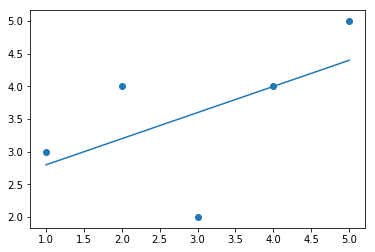

In [26]:
plt.scatter(x,y)
plt.plot(x,f)
plt.show()

In [28]:
y=W1*10+W0
y

6.4

### Using Scikit-Learn

In [2]:
from sklearn.linear_model import LinearRegression

In [64]:
l=[[1,3],[2,4],[3,2],[4,4],[5,5]]
df=pd.DataFrame(l,columns=['x','y'])
df


,x,y
0,1,3
1,2,4
2,3,2
3,4,4
4,5,5


In [65]:
x=df.x
y=df.y

In [66]:
df.iloc[:,0:1].values

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [67]:
x=x.values.reshape(-1,1)
y=y.values
print(x)
print(y)

[[1]
 [2]
 [3]
 [4]
 [5]]
[3 4 2 4 5]


In [68]:
reg=LinearRegression()
reg=reg.fit(x,y)
Y_pred=reg.predict(x)
print(Y_pred)

[2.8 3.2 3.6 4.  4.4]


In [70]:
print(reg.coef_)
print(reg.intercept_)

[0.4]
2.4000000000000004


In [71]:
reg.score(x,y)

0.3076923076923075



### Suicide Case Study

In [3]:
import pandas as pd
data=pd.read_csv('Suicidesindia2001-2012.csv')
data

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [8]:
Y_Suicide=data.groupby('Year').Total.sum()
Y_Suicide

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

In [9]:
x=Y_Suicide.index.values
y=Y_Suicide.values
print(x)
print(y)

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]
[ 976464  993648  997622 1023137 1025201 1062991 1103667 1125082 1144033
 1211322 1219499 1189068]


In [10]:
x=x.reshape(-1,1)
print(x)

[[2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]


In [4]:
from sklearn.linear_model import LinearRegression

In [12]:
reg=LinearRegression()
reg=reg.fit(x,y)
Y_pred=reg.predict(x)
print(Y_pred)

[ 958311.12820512  982129.31701631 1005947.5058275  1029765.69463869
 1053583.88344987 1077402.07226107 1101220.26107226 1125038.44988345
 1148856.63869463 1172674.82750582 1196493.01631701 1220311.2051282 ]


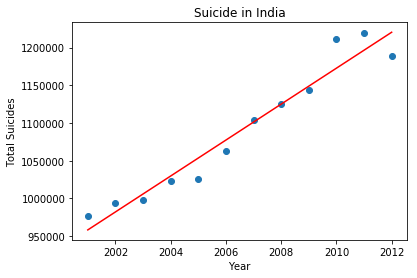

In [95]:
plt.scatter(x,y)
plt.plot(x,Y_pred,color='r')
plt.title("Suicide in India")
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.show()

In [96]:
print(reg.coef_)
print(reg.intercept_)

[23818.18881119]
-46701884.682983674


In [97]:
reg.score(x,y)

0.9461522633937145

In [104]:
l=[[2013],[2014],[2015],[2016],[2017],[2018],[2019]]


In [105]:
reg.predict(l)


array([1244129.39393939, 1267947.58275057, 1291765.77156176,
       1315583.96037295, 1339402.14918415, 1363220.33799534,
       1387038.52680652])

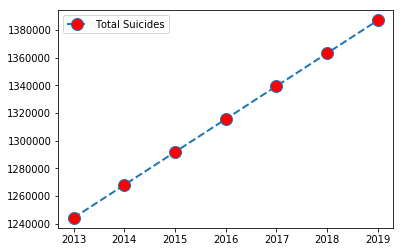

In [122]:
plt.plot(l,reg.predict(l),marker='o',linewidth=2,markerfacecolor='r',markersize=12,linestyle='dashed',label='Total Suicides')
plt.legend()
plt.show()